<a href="https://colab.research.google.com/github/RenzoAlvaroshan/Tensorflow-Tutorial/blob/master/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [5]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [6]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5633 - accuracy: 0.4294 - val_loss: 1.2708 - val_accuracy: 0.5410
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2722 - accuracy: 0.5418 - val_loss: 1.1639 - val_accuracy: 0.5863
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1409 - accuracy: 0.5910 - val_loss: 1.0337 - val_accuracy: 0.6336
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0606 - accuracy: 0.6203 - val_loss: 0.9769 - val_accuracy: 0.6543
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9826 - accuracy: 0.6499 - val_loss: 0.9389 - val_accuracy: 0.6684
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9287 - accuracy: 0.6688 - val_loss: 0.9105 - val_accuracy: 0.6823
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8828 - accuracy: 0.6859 - val_loss: 0.9278 - val_accuracy:

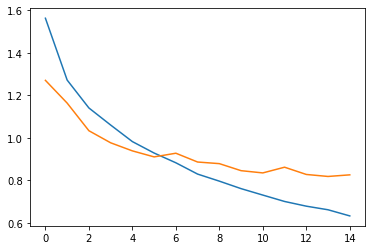

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

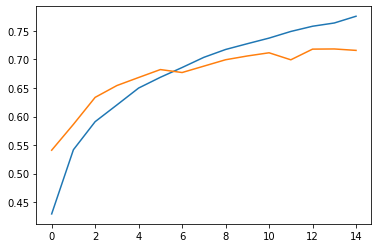

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

Confusion matrix without normalization
[[763  14  72   5  32   4   8  14  56  32]
 [ 13 844  10   2   8   1  10  10  13  89]
 [ 55   6 611  32 142  43  66  35   7   3]
 [ 16  10  82 414 136 179  74  55  13  21]
 [ 23   2  52  30 747  26  33  80   4   3]
 [ 12   2  64 123  80 596  30  84   5   4]
 [  7   8  33  39  75  29 786  15   6   2]
 [ 13   3  36  18  66  44   7 799   2  12]
 [ 69  32  19   6  16   4   4   8 819  23]
 [ 41  81  19  11  11   4  10  21  22 780]]


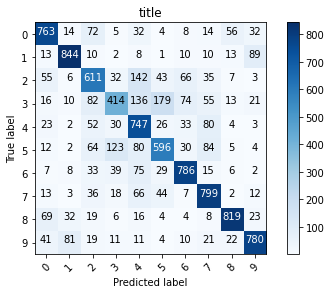

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title('title')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
  

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

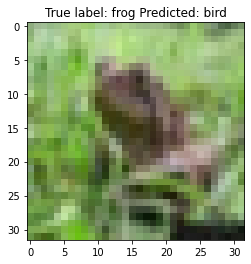

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));